In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime , timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset in csv file to dataframe:
copper=pd.read_csv(r"C:/Users/USER/Desktop/Robin vs/Copper/Copper_Set.xlsx - Result 1.csv",low_memory=False)
copper

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
#Converting The Datetime:
copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y%m%d', errors='coerce').dt.date

copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y%m%d', errors='coerce').dt.date

copper['quantity tons'] = pd.to_numeric(copper['quantity tons'], errors='coerce')

In [5]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [6]:
#Nagative Values Replace:
copper['quantity tons'] = copper['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
copper['selling_price'] = copper['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [7]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816650e+05
mean,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918124e+03
std,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.318020e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [8]:
copper.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [9]:
copper.isnull().sum()

id                   2
item_date            3
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        8
dtype: int64

In [10]:
#Drop Material column most of values are null values:
copper.drop(columns=['material_ref'],inplace=True)
copper.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [11]:
copper.isnull().sum()

id                2
item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [12]:
#Handling the Null Values for object mode:
copper['item_date'].fillna(copper['item_date'].mode().iloc[0],inplace=True)

copper['status'].fillna(copper['status'].mode().iloc[0], inplace=True)

copper['delivery date'].fillna(copper['delivery date'].mode().iloc[0], inplace=True)

copper['id'].fillna(copper['id'].mode().iloc[0], inplace=True)

In [13]:
copper['quantity tons'].fillna(copper['quantity tons'].median(), inplace=True)

copper['customer'].fillna(copper['customer'].median(), inplace=True)

copper['country'].fillna(copper['country'].median(), inplace=True)

copper['application'].fillna(copper['application'].median(), inplace=True)

copper['thickness'].fillna(copper['thickness'].median(), inplace=True)

copper['selling_price'].fillna(copper['selling_price'].median(), inplace=True)

In [14]:
copper.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
copper['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [16]:
#Convert catagorical column to numeric column:
copper['status'] = copper['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':4, 'Not lost for AM':5,
                                         'Wonderful':6, 'Revised':7, 'Offered':8, 'Offerable':9,})

In [17]:
copper['status'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [18]:
copper['item type'] = OrdinalEncoder().fit_transform(copper[['item type']])

In [19]:
copper['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [20]:
#No Nagative values on this frame:
copper.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05
mean,5.874905e+03,3.051221e+07,44.890727,2.206552,4.133036,25.614406,2.564822,1295.286724,4.739679e+08,1.918076e+03
std,2.349075e+06,2.433375e+07,24.403034,1.717110,1.055230,17.753421,6.572303,261.631754,7.175101e+08,3.317947e+05
min,1.000000e-05,1.245800e+04,25.000000,1.000000,0.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097167e+01,3.019688e+07,26.000000,1.000000,3.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036501e+01,3.020524e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716038e+01,3.028042e+07,78.000000,4.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,9.000000,6.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [21]:
#Finaly Dataframe Convert to csv:
copper.to_csv("Copper_Final.csv", index=False)

In [22]:
#Read Clean csv file:
clean_df=pd.read_csv(r"C:/Users/USER/Desktop/Robin vs/guvi_projects/Copper_Final.csv")

clean_df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [23]:
clean_2=clean_df.copy()

In [24]:
clean_2.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [25]:
# detecting the skewed columns using plot

def plot(clean_df,column):

    # Boxplot
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.boxplot(clean_df,x=column)  
    plt.title("Boxplot for"+" "+column) 

    # Histogram plot
    plt.subplot(1,3,2)
    sns.histplot(clean_df,x=column,kde=True,bins=30,color="salmon")
    plt.title("Histogram plot for"+" "+column)

    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(clean_df,x=column)
    plt.title("Box plot for"+" "+column)

In [26]:
# skewed columns converted to log transfermation method:
clean_2['quantity tons_log'] = np.log(clean_2['quantity tons'])
clean_2['customer_log'] = np.log(clean_2['customer'])
clean_2['thickness_log'] = np.log(clean_2['thickness'])
clean_2['selling_price_log'] = np.log(clean_2['selling_price'])

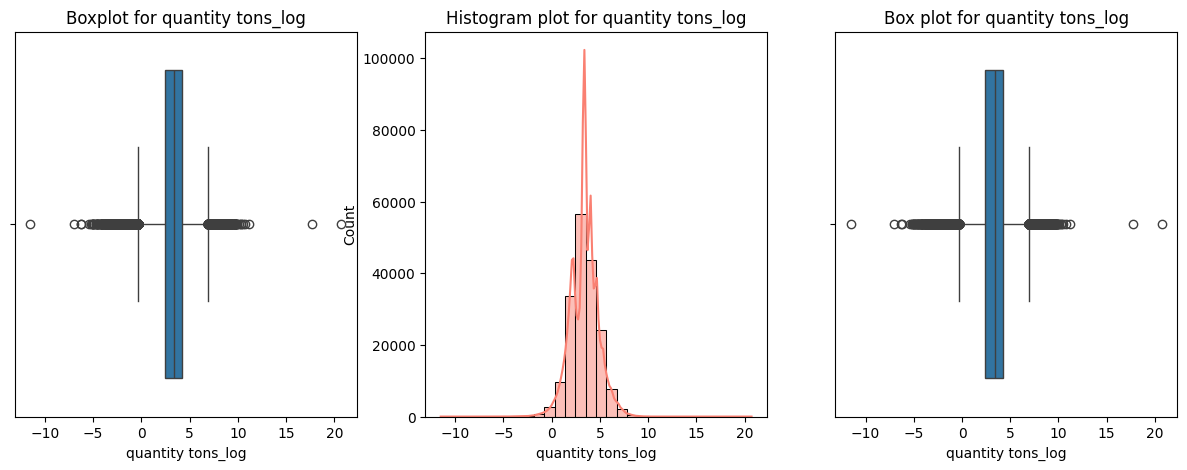

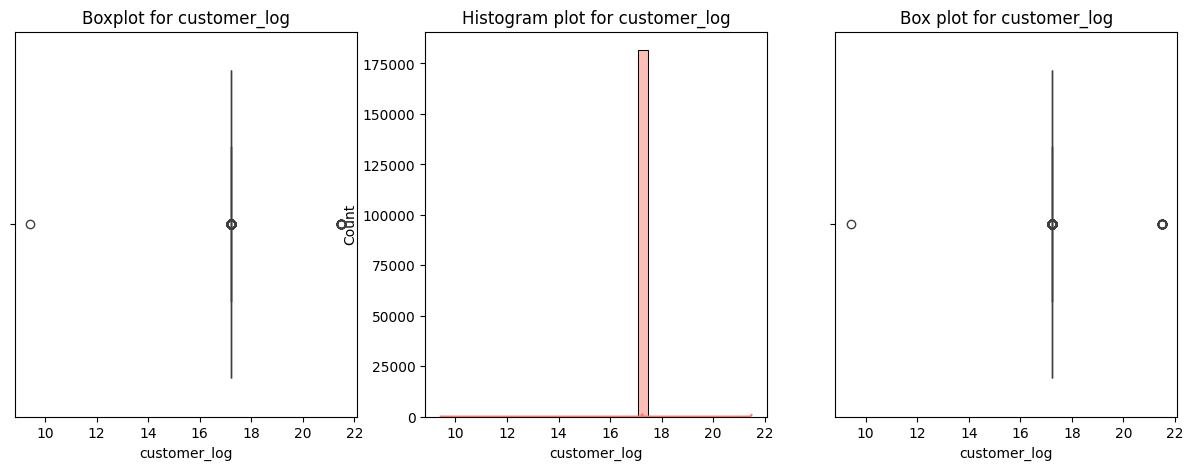

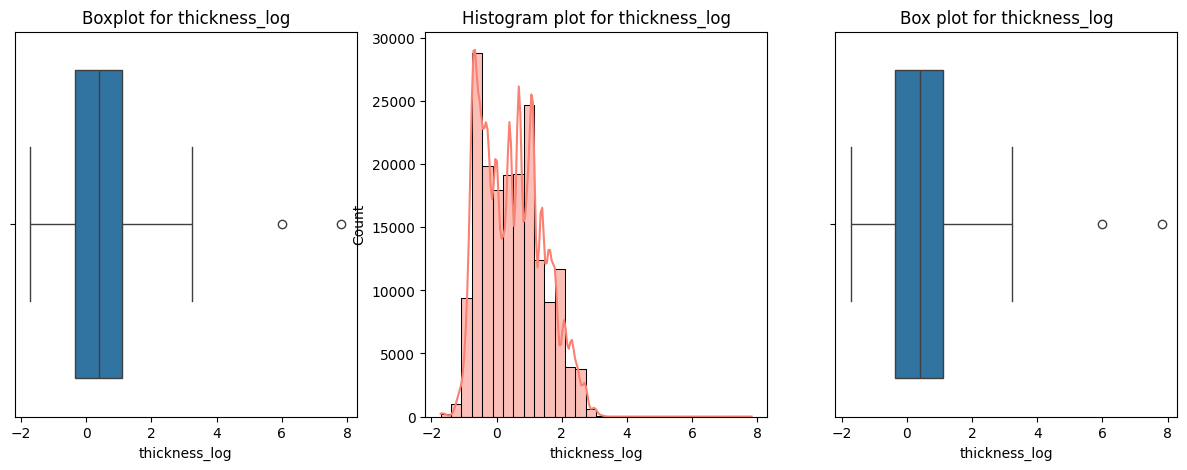

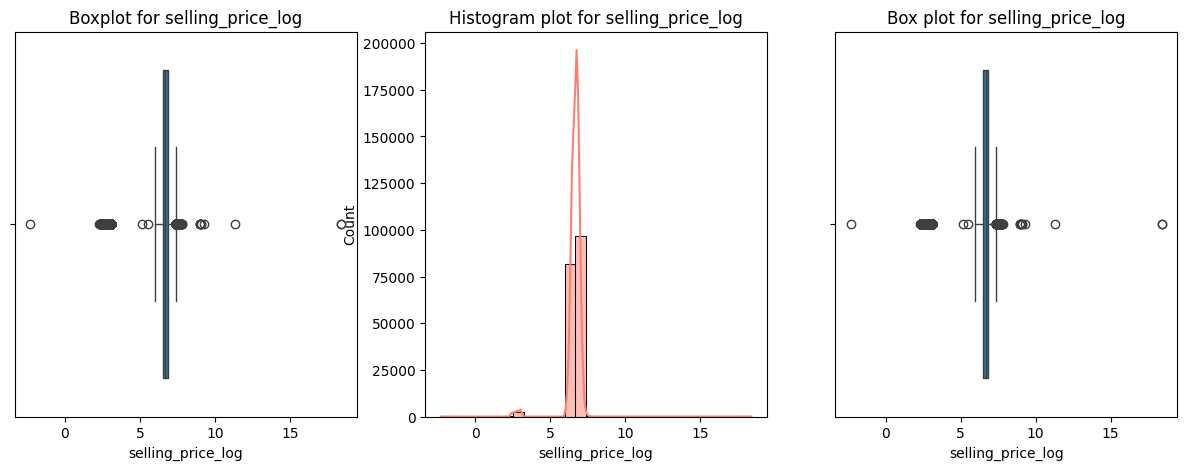

In [27]:
skewed_column=['quantity tons_log','customer_log','thickness_log','selling_price_log']

for i in skewed_column:
    plot(clean_2,i)

In [28]:
clean_3=clean_2.copy()
clean_3.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,customer_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,17.221905,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,17.223450,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,17.221827,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,17.228293,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,17.223735,1.386294,6.357842


In [29]:
def outlier(clean_df,column):
    q1=clean_df[column].quantile(0.25)
    q2=clean_df[column].quantile(0.75)

    iqr=q2-q1

    upper_threshold=q2 + (1.5*iqr)
    lower_threshold=q1 + (1.5*iqr)

    clean_df[column] = clean_df[column].clip(lower_threshold, upper_threshold)

In [30]:
clean_3.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,2.206552e+00,1.717110e+00,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [31]:
clean_3.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [32]:
outlier_column=['quantity tons_log','customer_log','thickness_log','selling_price_log','width','application']
for i in outlier_column:
    outlier(clean_3,i)

In [33]:
clean_3.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,2.206552e+00,1.717110e+00,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,5.691687e+01,2.408690e+00,56.500000,5.650000e+01,5.650000e+01,5.650000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.677509e+03,7.105983e+01,1660.000000,1.660000e+03,1.660000e+03,1.660000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


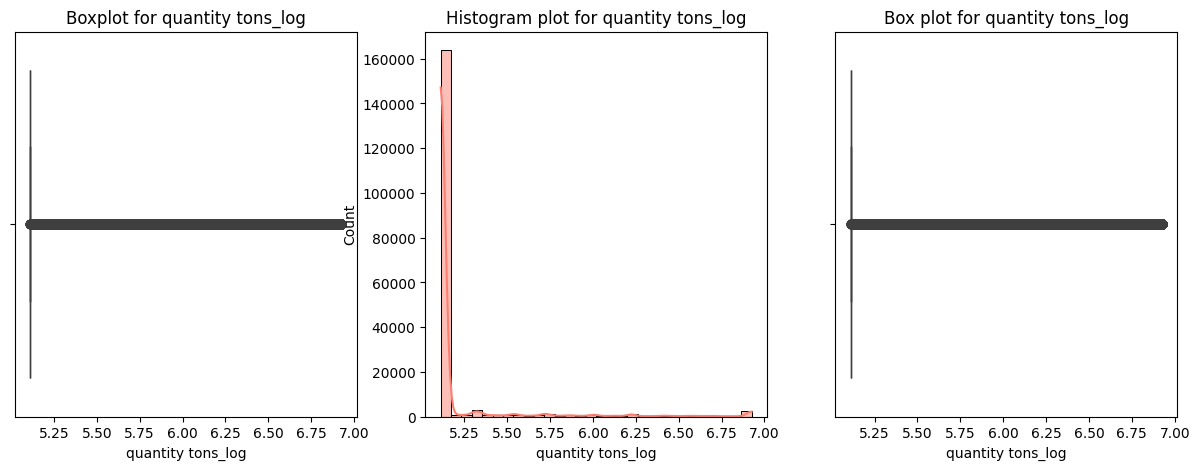

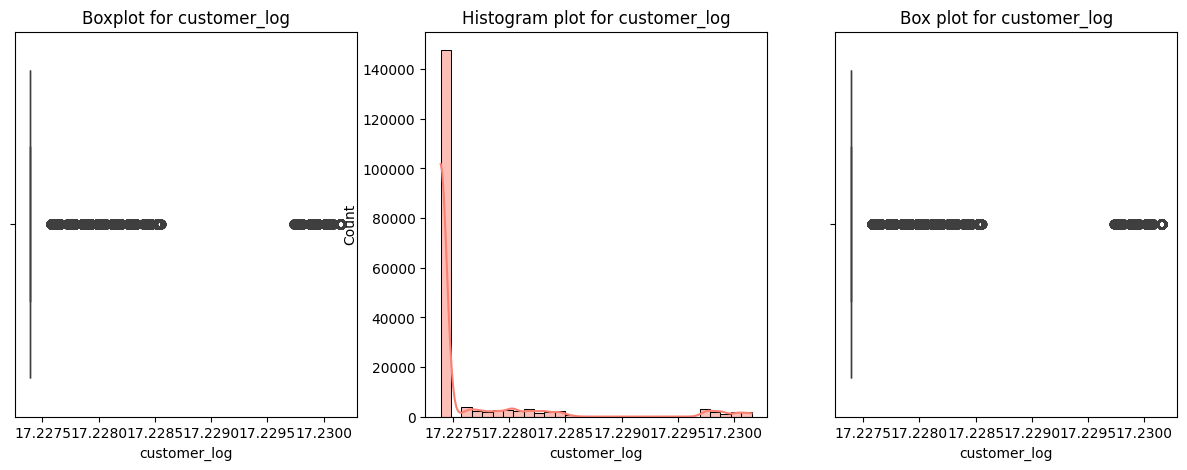

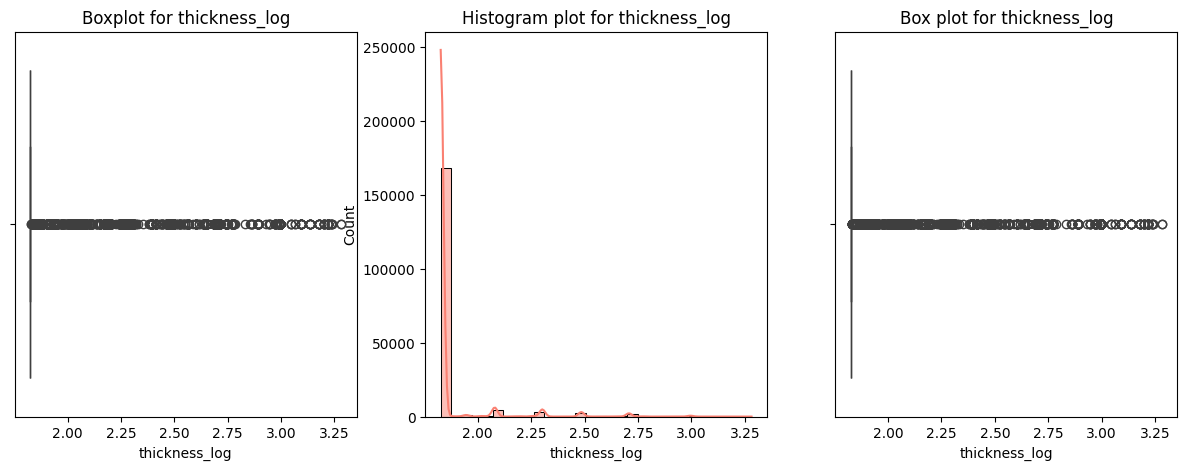

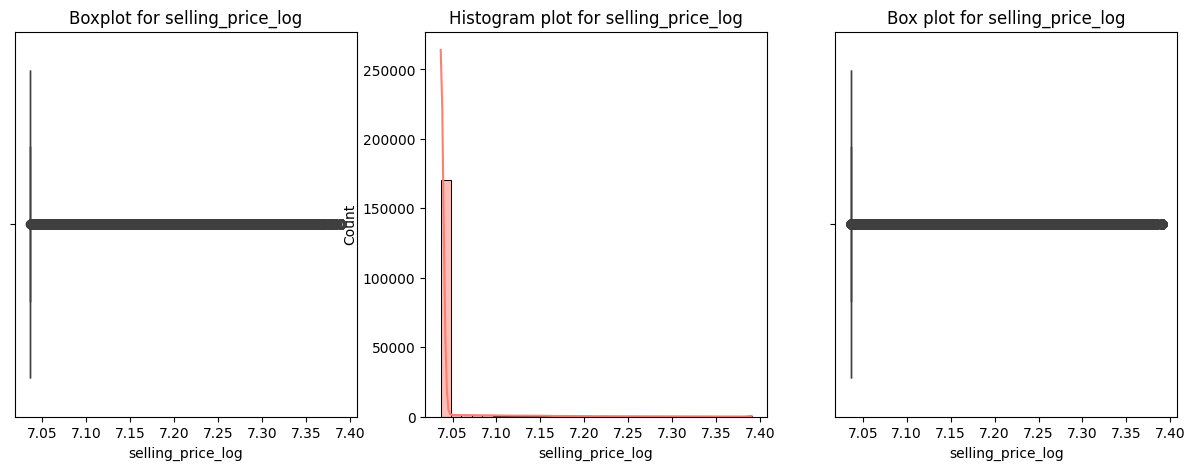

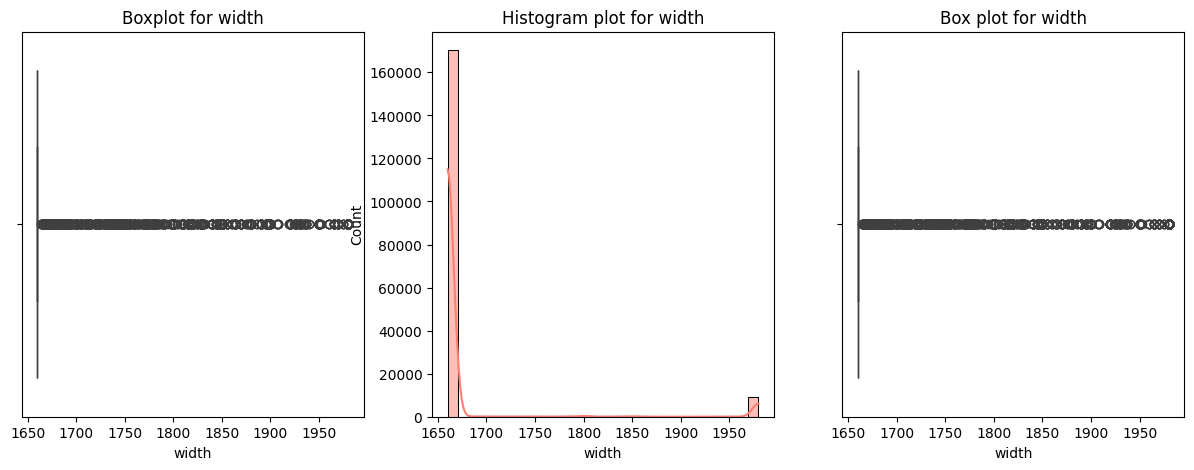

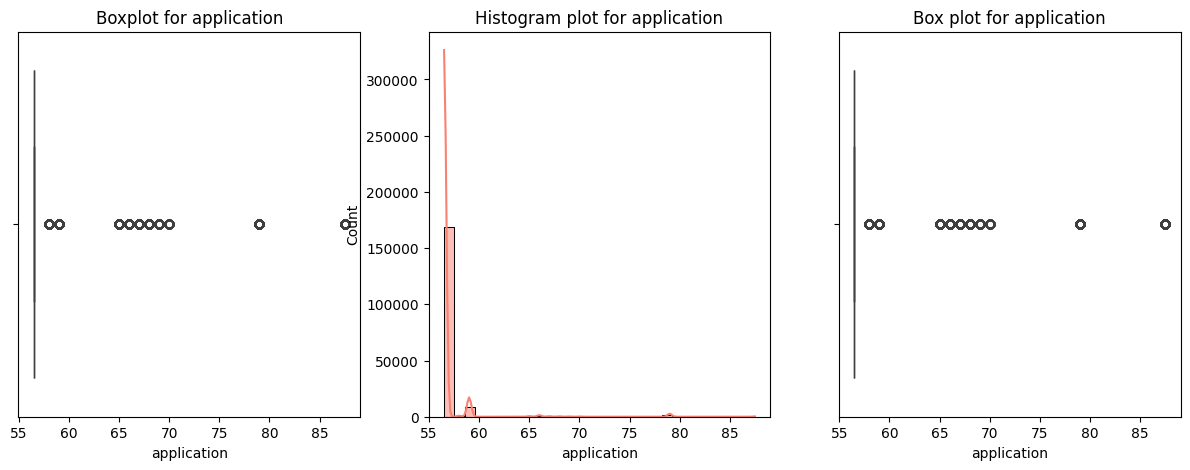

In [34]:
for i in outlier_column:
    plot(clean_3,i)

In [35]:
clean_3.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [36]:
#Drop unwanted skewed column:

clean_4=clean_2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [37]:
clean_4.head()

,id,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,28.0,1,5.0,10.0,2000.0,640665,2021-03-01,6.666354,17.223735,1.386294,6.357842


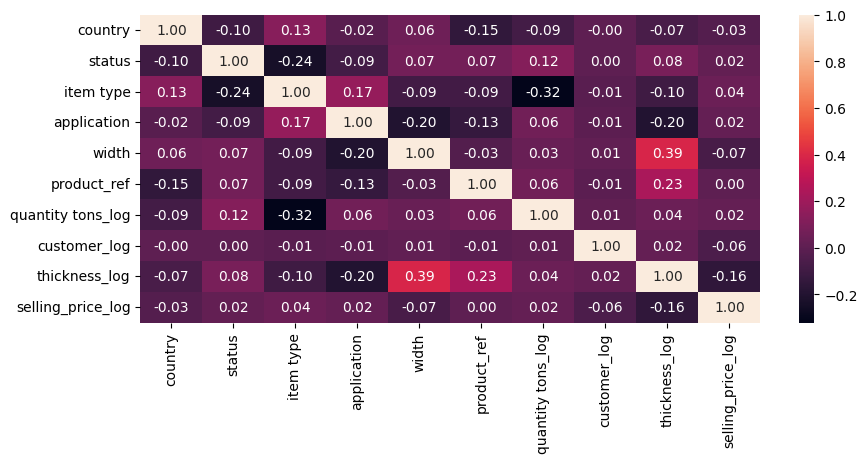

In [38]:
# Checking the correlation with using the heatmap:
correlation=clean_4.drop(columns=['id','item_date','delivery date']).corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation, annot=True, fmt="0.2f")
plt.show()

In [39]:
clean_5=clean_4.copy()
clean_5.head()

,id,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,28.0,1,5.0,10.0,2000.0,640665,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [40]:
clean_5.drop(columns=['id'], inplace=True)

In [41]:
clean_5.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log
0,2021-04-01,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,2021-04-01,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,2021-04-01,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,2021-04-01,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,2021-04-01,28.0,1,5.0,10.0,2000.0,640665,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [42]:
clean_5.dtypes

item_date             object
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date         object
quantity tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [43]:
# Converting the datatype (object to datetime format)

clean_5["item_date"] = pd.to_datetime(clean_5["item_date"])
clean_5["delivery date"] = pd.to_datetime(clean_5["delivery date"])

In [44]:
# identifying the difference of the "delivery date" and "item date"

clean_5["date_differ"] = (clean_5["delivery date"]-clean_5["item_date"]).dt.days

In [45]:
clean_5['date_differ']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [46]:
# creating the another 3 columns using the "item_date_1"
# it is usefull for the "delivery date" prediction

clean_5["item_date_day"] = clean_5["item_date"].dt.day
clean_5["item_date_month"] = clean_5["item_date"].dt.month
clean_5["item_date_year"] = clean_5["item_date"].dt.year

In [47]:
clean_5.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,2021-04-01,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,2021-04-01,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,2021-04-01,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,2021-04-01,28.0,1,5.0,10.0,2000.0,640665,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [48]:
# postive values(pv) dataframe
df5_pv = clean_5[clean_5["date_differ"]>=0]
df5_pv.reset_index(drop=True,inplace=True)

In [49]:
df5_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,2020-07-02,25.0,4,3.0,15.0,2000.0,640665,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,2020-07-02,30.0,4,3.0,10.0,1525.0,640665,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,2020-07-02,30.0,4,3.0,10.0,1525.0,640665,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,2020-07-02,30.0,4,3.0,10.0,1500.0,640665,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,2020-07-02,30.0,4,3.0,10.0,1830.0,640665,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [50]:
# nagative values(nv) dataframe
clean5_nv = clean_5[clean_5["date_differ"]<0]
clean5_nv.reset_index(drop=True,inplace=True)

In [51]:
clean5_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16103,2020-07-02,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,2020-07-02,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,2020-07-02,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,2020-07-02,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,2020-07-02,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [52]:
# create the model for "delivery date" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [53]:
clean5_nv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'quantity tons_log', 'customer_log',
       'thickness_log', 'selling_price_log', 'date_differ', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [54]:
def accuracy_date_prediction(clean_df,algorithm):
    x = clean_df.drop(columns=["item_date","delivery date","date_differ"])
    y = clean_df["date_differ"]

    # train dataset and test dataset spliting
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # checking the accuracy score
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    metrics = {"R2_score":r2,
              "mean_squared_error":mse,
              "Root_mean_squared_error":rmse,
              "mean_absolute_error":mae}
    return metrics

In [55]:
print(accuracy_date_prediction(clean5_nv,DecisionTreeRegressor))
print(accuracy_date_prediction(clean5_nv,RandomForestRegressor))
print(accuracy_date_prediction(clean5_nv,ExtraTreesRegressor))
print(accuracy_date_prediction(clean5_nv,GradientBoostingRegressor))
print(accuracy_date_prediction(clean5_nv,AdaBoostRegressor))
print(accuracy_date_prediction(clean5_nv,XGBRegressor))

{'R2_score': 0.5913238241289409, 'mean_squared_error': 482.28150217256365, 'Root_mean_squared_error': 21.960908500619087, 'mean_absolute_error': 3.0394165114835507}
{'R2_score': 0.8115105891975383, 'mean_squared_error': 222.43762067039108, 'Root_mean_squared_error': 14.914342783723026, 'mean_absolute_error': 3.584972067039106}
{'R2_score': 0.8633345664446878, 'mean_squared_error': 161.27979677219122, 'Root_mean_squared_error': 12.699598291764634, 'mean_absolute_error': 2.546859093730602}
{'R2_score': 0.5977146368162205, 'mean_squared_error': 474.739661162734, 'Root_mean_squared_error': 21.788521316572496, 'mean_absolute_error': 10.051395158675808}
{'R2_score': -5.420701040315819, 'mean_squared_error': 7577.112456150257, 'Root_mean_squared_error': 87.0466108251795, 'mean_absolute_error': 83.9349435936767}
{'R2_score': 0.8347994773650261, 'mean_squared_error': 194.95424720139636, 'Root_mean_squared_error': 13.962601734683846, 'mean_absolute_error': 4.889478601088076}


In [56]:
#Random Forest:

def RandomForest(train_df,test_df):

    x = train_df.drop(columns = ["item_date","delivery date","date_differ"])
    y = train_df["date_differ"]

    # train dataset and test dataset splitting
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model = RandomForestRegressor().fit(x_train,y_train)

    data = test_df.drop(columns =["item_date","delivery date","date_differ"])

    y_pred = model.predict(data)

    return y_pred

In [57]:
date_difference = RandomForest(df5_pv,clean5_nv)

In [58]:
date_difference

array([ 49.35, 107.49,  83.85, ...,  42.73,  42.49,  44.54])

In [59]:
# changing the "date_differ" datatype float into int

date_difference_1 = []
for i in date_difference:
    data_int = int(round(i,0))
    date_difference_1.append(data_int)

In [60]:
clean5_nv["date_differ"] = pd.DataFrame(date_difference_1)

In [61]:
# find the delivery date using "item_date" and "date_differ"

def find_delivery_date(item_date, date_differ):
    date = item_date + pd.to_timedelta(date_differ,unit = "D")
    return date

In [62]:
clean5_nv["delivery date"] = find_delivery_date(clean5_nv["item_date"],clean5_nv["date_differ"])

In [63]:
# Concadinating the two dataframes(df5_pv,df5_nv) based on the rows
df_final = pd.concat([df5_pv,clean5_nv],axis=0,ignore_index=True)

In [64]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,2020-07-02,25.0,1,5.0,41.0,1220.0,164141591,2020-08-13,4.629691,17.223381,-0.040822,6.381816,42,2,7,2020
181669,2020-07-02,25.0,1,5.0,41.0,1500.0,164141591,2020-08-16,5.337954,17.223381,-0.051293,6.378426,45,2,7,2020
181670,2020-07-02,25.0,1,5.0,41.0,1250.0,164141591,2020-08-14,1.443523,17.223381,-0.342490,6.428105,43,2,7,2020
181671,2020-07-02,25.0,1,5.0,41.0,1250.0,164141591,2020-08-13,3.413291,17.223381,-0.162519,6.398595,42,2,7,2020
181672,2020-07-02,25.0,1,5.0,41.0,1240.0,164141591,2020-08-16,6.008043,17.223381,-0.342490,6.408529,45,2,7,2020


In [65]:
# Now we create the three new columns using the "delivery_date"

df_final["delivery date_day"] = df_final["delivery date"].dt.day
df_final["delivery date_month"] = df_final["delivery date"].dt.month
df_final["delivery date_year"] = df_final["delivery date"].dt.year

In [66]:
df_final.head(3)

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,2021-04-01,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,2021-04-01,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,2021-04-01,25.0,1,5.0,41.0,1265.0,1668701718,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021


In [67]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'quantity tons_log', 'customer_log',
       'thickness_log', 'selling_price_log', 'date_differ', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery date_day',
       'delivery date_month', 'delivery date_year'],
      dtype='object')

In [68]:
# Droping the unwanted columns

df_final.drop(columns=["item_date","delivery date","date_differ"],inplace=True)

In [69]:
df_final.head(2)

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021


In [70]:
# Dataframe converted to csv file
df_final.to_csv("Indu_Copper_Final_Data.csv",index=False)

In [71]:
df_final_1=pd.read_csv(r"C:/Users/USER/Desktop/Robin vs/guvi_projects/Indu_Copper_Final_Data.csv")

In [72]:
df_final_1.head()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,2.890372,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


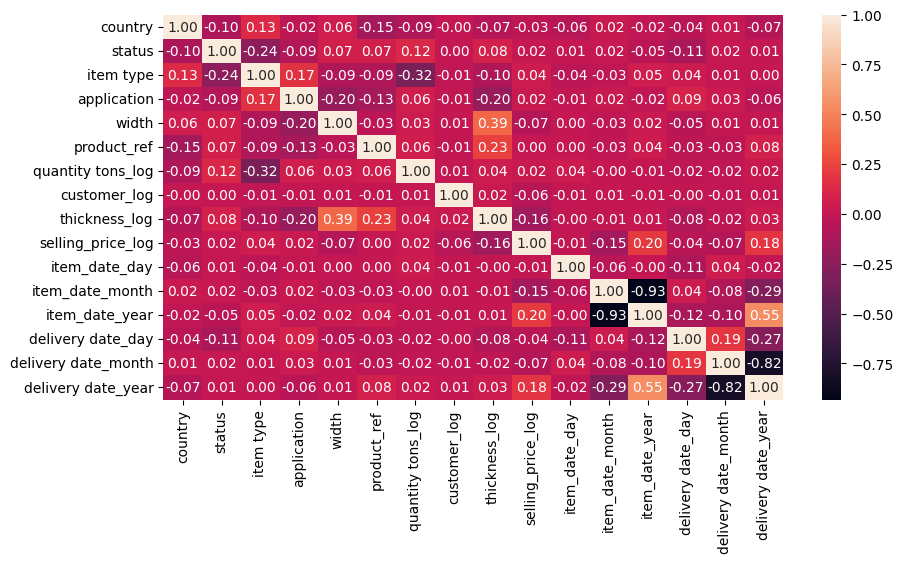

In [73]:
#Heatmap:
correlation = df_final_1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,fmt="0.2f")
plt.show()

Classification

In [74]:
# import Packages:
import numpy as np
import concurrent.futures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle

In [75]:
class_df=df_final_1.copy()

In [76]:
class_df['status'].value_counts()

status
1    116012
4     34438
5     19573
7      4276
3      4170
2      3140
8        53
9        10
6         1
Name: count, dtype: int64

In [77]:
# filter the status column only want to be a (Won & Loss)
class_1 = class_df[(class_df["status"] == 1) | (class_df["status"] == 4)]

In [78]:
class_1.tail()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,13,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,16,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,14,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,13,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,16,8,2020


In [79]:
class_1["status"].value_counts()

status
1    116012
4     34438
Name: count, dtype: int64

In [80]:
class_1.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [81]:
# Features and Target set
x = class_1.drop(columns=["status"],axis=1)
y = class_1["status"]

In [82]:
x.shape, y.shape

((150450, 15), (150450,))

In [83]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [84]:
x_new.shape,y_new.shape

((230214, 15), (230214,))

In [85]:
y_new.value_counts()

status
1    115107
4    115107
Name: count, dtype: int64

In [86]:
# Find the best algorithm for the classification prediction

def accuracy_checking(x_data,y_data,algorithm):
    # train test splitting
    x_train, x_test ,y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # checking the accuracy score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)

    metrics =  {"Algorithm": algorithm.__name__,
                "Accuracy_Train":accuracy_train,
                "Accuracy_Test":accuracy_test}
    return metrics

In [87]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9494848786972416}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9698238617480891}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9753074111000333}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8156364240611499, 'Accuracy_Test': 0.8151545363908275}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8374376869391824, 'Accuracy_Test': 0.8350614822200066}


In [88]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9640119019177725}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9820602480290164}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9854918228612384}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7823978802308724, 'Accuracy_Test': 0.7842885997871555}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8212042069598362, 'Accuracy_Test': 0.8250331212127794}


In [89]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Parameters for GridSearchCV
parameters = {
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": [None]
}

# Define the GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)

# Function to perform fitting in a thread
def fit_model():
    gridsearch.fit(x_train, y_train)
    return gridsearch

# Using ThreadPoolExecutor to run the fitting process in a separate thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(fit_model)
    best_model = future.result()

In [90]:
print(f"Best Score: {best_model.best_score_}")
print(f"Best Parameters: {best_model.best_params_}")

Best Score: 0.9671012407542241
Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [91]:
# RandomForest algorithm and check the accuracy for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# checking the accuracy score for train and test
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

Accuracy score for Train and Test

In [92]:
print("Accuracy_Train: ",accuracy_train )
print("Accuracy_Test: ",accuracy_test)

# confution matrics and the classification report for test
print("Confusion_Matrix for Test")

print(confusion_matrix(y_true=y_test,y_pred=y_pred_test))
print(" ")
print("Classification Report for Test")

print(classification_report(y_true=y_test,y_pred=y_pred_test))

Accuracy_Train:  0.9861107340460767
Accuracy_Test:  0.9678995721390874
Confusion_Matrix for Test
[[21737  1075]
 [  403 22828]]
 
Classification Report for Test
              precision    recall  f1-score   support

           1       0.98      0.95      0.97     22812
           4       0.96      0.98      0.97     23231

    accuracy                           0.97     46043
   macro avg       0.97      0.97      0.97     46043
weighted avg       0.97      0.97      0.97     46043



In [93]:
# saving the model using the pickle

with open("Classification_model.pkl", "wb") as f:
    pickle.dump(model,f)

In [94]:
with open("Classification_model.pkl","rb") as f1:
    class_model = pickle.load(f1)

In [95]:
user_data1 = np.array([[92,1.0,5.0,6500.0,765465,2.677355,15.577446,0.3,6.11454,6,7,2021,4,3,2021]])
y_pred_user1 = class_model.predict(user_data1)

if y_pred_user1 == 1:
    print("Won")
else:
    print("Lose")    

Won


Regression Method

In [96]:
# import packages

import concurrent.futures
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [97]:
df_reg = df_final_1.copy()

In [98]:
df_reg.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [101]:
# Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):
    # Features and Target set
    x = df.drop(columns = ["selling_price_log"],axis= 1)
    y = df["selling_price_log"]

    # train set and test set splitting
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_score_train = r2_score(y_train,y_pred_train)
    r2_score_test = r2_score(y_test,y_pred_test)

    metrics = {"Algorithm":algorithm.__name__,
               "R2_Score_Train":r2_score_train,
               "R2_Score_Test":r2_score_test}
    return metrics

In [102]:
print(accuracy_regressor(df_reg, DecisionTreeRegressor))
print(accuracy_regressor(df_reg, RandomForestRegressor))
print(accuracy_regressor(df_reg, ExtraTreesRegressor))
print(accuracy_regressor(df_reg, AdaBoostRegressor))
print(accuracy_regressor(df_reg, GradientBoostingRegressor))
print(accuracy_regressor(df_reg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Score_Train': 1.0, 'R2_Score_Test': 0.9474474695221993}
{'Algorithm': 'RandomForestRegressor', 'R2_Score_Train': 0.9958275250627676, 'R2_Score_Test': 0.968019913745562}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Score_Train': 1.0, 'R2_Score_Test': 0.9710673484857921}
{'Algorithm': 'AdaBoostRegressor', 'R2_Score_Train': -0.5504123695034249, 'R2_Score_Test': -0.5444460944024054}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Score_Train': 0.965618613433936, 'R2_Score_Test': 0.9507091239919175}
{'Algorithm': 'XGBRegressor', 'R2_Score_Train': 0.9848272782194558, 'R2_Score_Test': 0.9687696287288929}


In [103]:
# Handling Overfitting in train model 

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# Train set and Test set Splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Parameters for GridSearchCV
parameters = {
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": [None]
}

# Define the GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5, n_jobs=-1)

# Function to perform fitting in a thread
def fit_model_1():
    gridsearch.fit(x_train, y_train)
    return gridsearch

# Using ThreadPoolExecutor to run the fitting process in a separate thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(fit_model_1)
    best_model_reg = future.result()

In [104]:
print(f"Best Score: {best_model_reg.best_score_}")
print(f"Best Parameters: {best_model_reg.best_params_}")

Best Score: 0.9667740337400698
Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [105]:
# passing the parameters and check the accuracy for both training and testing 

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# training data and test data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_reg = RandomForestRegressor(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train = model_reg.predict(x_train)
y_pred_test = model_reg.predict(x_test)

r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

print(r2_score_train)
print(r2_score_test)

0.9931730274034508
0.9673984467882941


In [106]:
# predict the selling price with Hypertuning parameters and calculate the accuracy using metrics

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# training data and test data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_reg = RandomForestRegressor(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)
y_pred = model_reg.predict(x_test)

r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

metrics_reg = {"R2_Score": r2_score,
               "Mean_Squared_Error": mse,
               "Root_Mean_Squared_Error":rmse,
               "Mean_Absolute_Error":mae}
print(metrics_reg)

{'R2_Score': 0.9678414323715355, 'Mean_Squared_Error': 0.01064878913363912, 'Root_Mean_Squared_Error': 0.10319297036929947, 'Mean_Absolute_Error': 0.03858873704891253}


In [107]:
user_data_reg = np.array([[3529092,4,64,24,3214,36346633,0.3,2,56,-8.5,89845,352,6,3,73]])
y_pred = model_reg.predict(user_data_reg)

print("Predicted Selling Price With Log: ",y_pred[0])
print("Predicted Selling Price Without Log: ",np.exp(y_pred[0]))

Predicted Selling Price With Log:  5.922113497058124
Predicted Selling Price Without Log:  373.19963728147405


In [108]:
# Save the model in pickle formet

with open("Regression_Model.pkl","wb") as r:
    pickle.dump(model_reg, r)

In [109]:
with open("Regression_Model.pkl","rb") as r1:
    reg_model = pickle.load(r1)

In [117]:
df_final_1['country']

0         28.0
1         25.0
2         25.0
3         30.0
4         38.0
          ... 
181668    25.0
181669    25.0
181670    25.0
181671    25.0
181672    25.0
Name: country, Length: 181673, dtype: float64